Modeling Case Study (Individual)
Introduction to Machine Learning & AI - DAT-5329
Chase Kusterer - Faculty of Analytics
Hult International Business School

In [1]:
pip install scikit-learn

In [78]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

# classification-specific libraries
import phik                           # phi coefficient
import statsmodels.formula.api as smf # logistic regression
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                            recall_score, f1_score, classification_report)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

In [3]:
# storing the path to the dataset
file = "./birthweight.xlsx"


# reading the file into Python through pandas
df = pd.read_excel(io         =  file,
                   sheet_name = 'data',
                   header     =  0)
df.head(5)

,bwt_id,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,bwt_1,28,12.0,2,10.0,31.0,17.0,8.0,9.0,0.0,0.0,0,1,0,0,1,0,0,3317
1,bwt_2,21,NaN,1,6.0,21.0,NaN,8.0,9.0,NaN,NaN,0,1,0,0,1,0,0,1160
2,bwt_3,27,15.0,2,11.0,32.0,16.0,9.0,9.0,0.0,0.0,1,1,0,0,1,0,0,4706
3,bwt_4,33,17.0,1,20.0,39.0,17.0,9.0,10.0,0.0,0.0,0,0,0,1,0,0,1,3289
4,bwt_5,30,15.0,2,12.0,36.0,16.0,9.0,9.0,NaN,NaN,1,1,0,0,1,0,0,3490


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   bwt_id  409 non-null    object 
 1   mage    409 non-null    int64  
 2   meduc   404 non-null    float64
 3   monpre  409 non-null    int64  
 4   npvis   391 non-null    float64
 5   fage    408 non-null    float64
 6   feduc   401 non-null    float64
 7   omaps   407 non-null    float64
 8   fmaps   407 non-null    float64
 9   cigs    381 non-null    float64
 10  drink   382 non-null    float64
 11  male    409 non-null    int64  
 12  mwhte   409 non-null    int64  
 13  mblck   409 non-null    int64  
 14  moth    409 non-null    int64  
 15  fwhte   409 non-null    int64  
 16  fblck   409 non-null    int64  
 17  foth    409 non-null    int64  
 18  bwght   409 non-null    int64  
dtypes: float64(8), int64(10), object(1)
memory usage: 60.8+ KB


In [146]:
num_df = df.select_dtypes('number')
df[num_df.columns] = num_df.fillna(num_df.mean())
df.isnull().sum()

bwt_id    0
mage      0
meduc     0
monpre    0
npvis     0
fage      0
feduc     0
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

In [147]:
# Descriptive statistics
df.describe()

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
count,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000
mean,29.850856,13.655941,2.220049,11.565217,32.240196,13.902743,8.196560,8.953317,1.194226,0.023560,0.488998,0.872861,0.073350,0.053790,0.875306,0.073350,0.051345,3189.870416
std,5.126321,2.143833,1.334126,3.803406,6.127818,2.215812,1.409244,0.581818,4.116451,0.308332,0.500491,0.333537,0.261029,0.225879,0.330777,0.261029,0.220970,748.450059
min,16.000000,3.000000,0.000000,0.000000,18.000000,6.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,360.000000
25%,27.000000,12.000000,1.000000,10.000000,28.000000,12.000000,8.000000,9.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2780.000000
50%,30.000000,13.655941,2.000000,12.000000,32.000000,14.000000,9.000000,9.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3340.000000
75%,33.000000,16.000000,3.000000,12.000000,36.000000,16.000000,9.000000,9.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3686.000000
max,44.000000,17.000000,8.000000,36.000000,62.000000,17.000000,10.000000,10.000000,30.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5089.000000


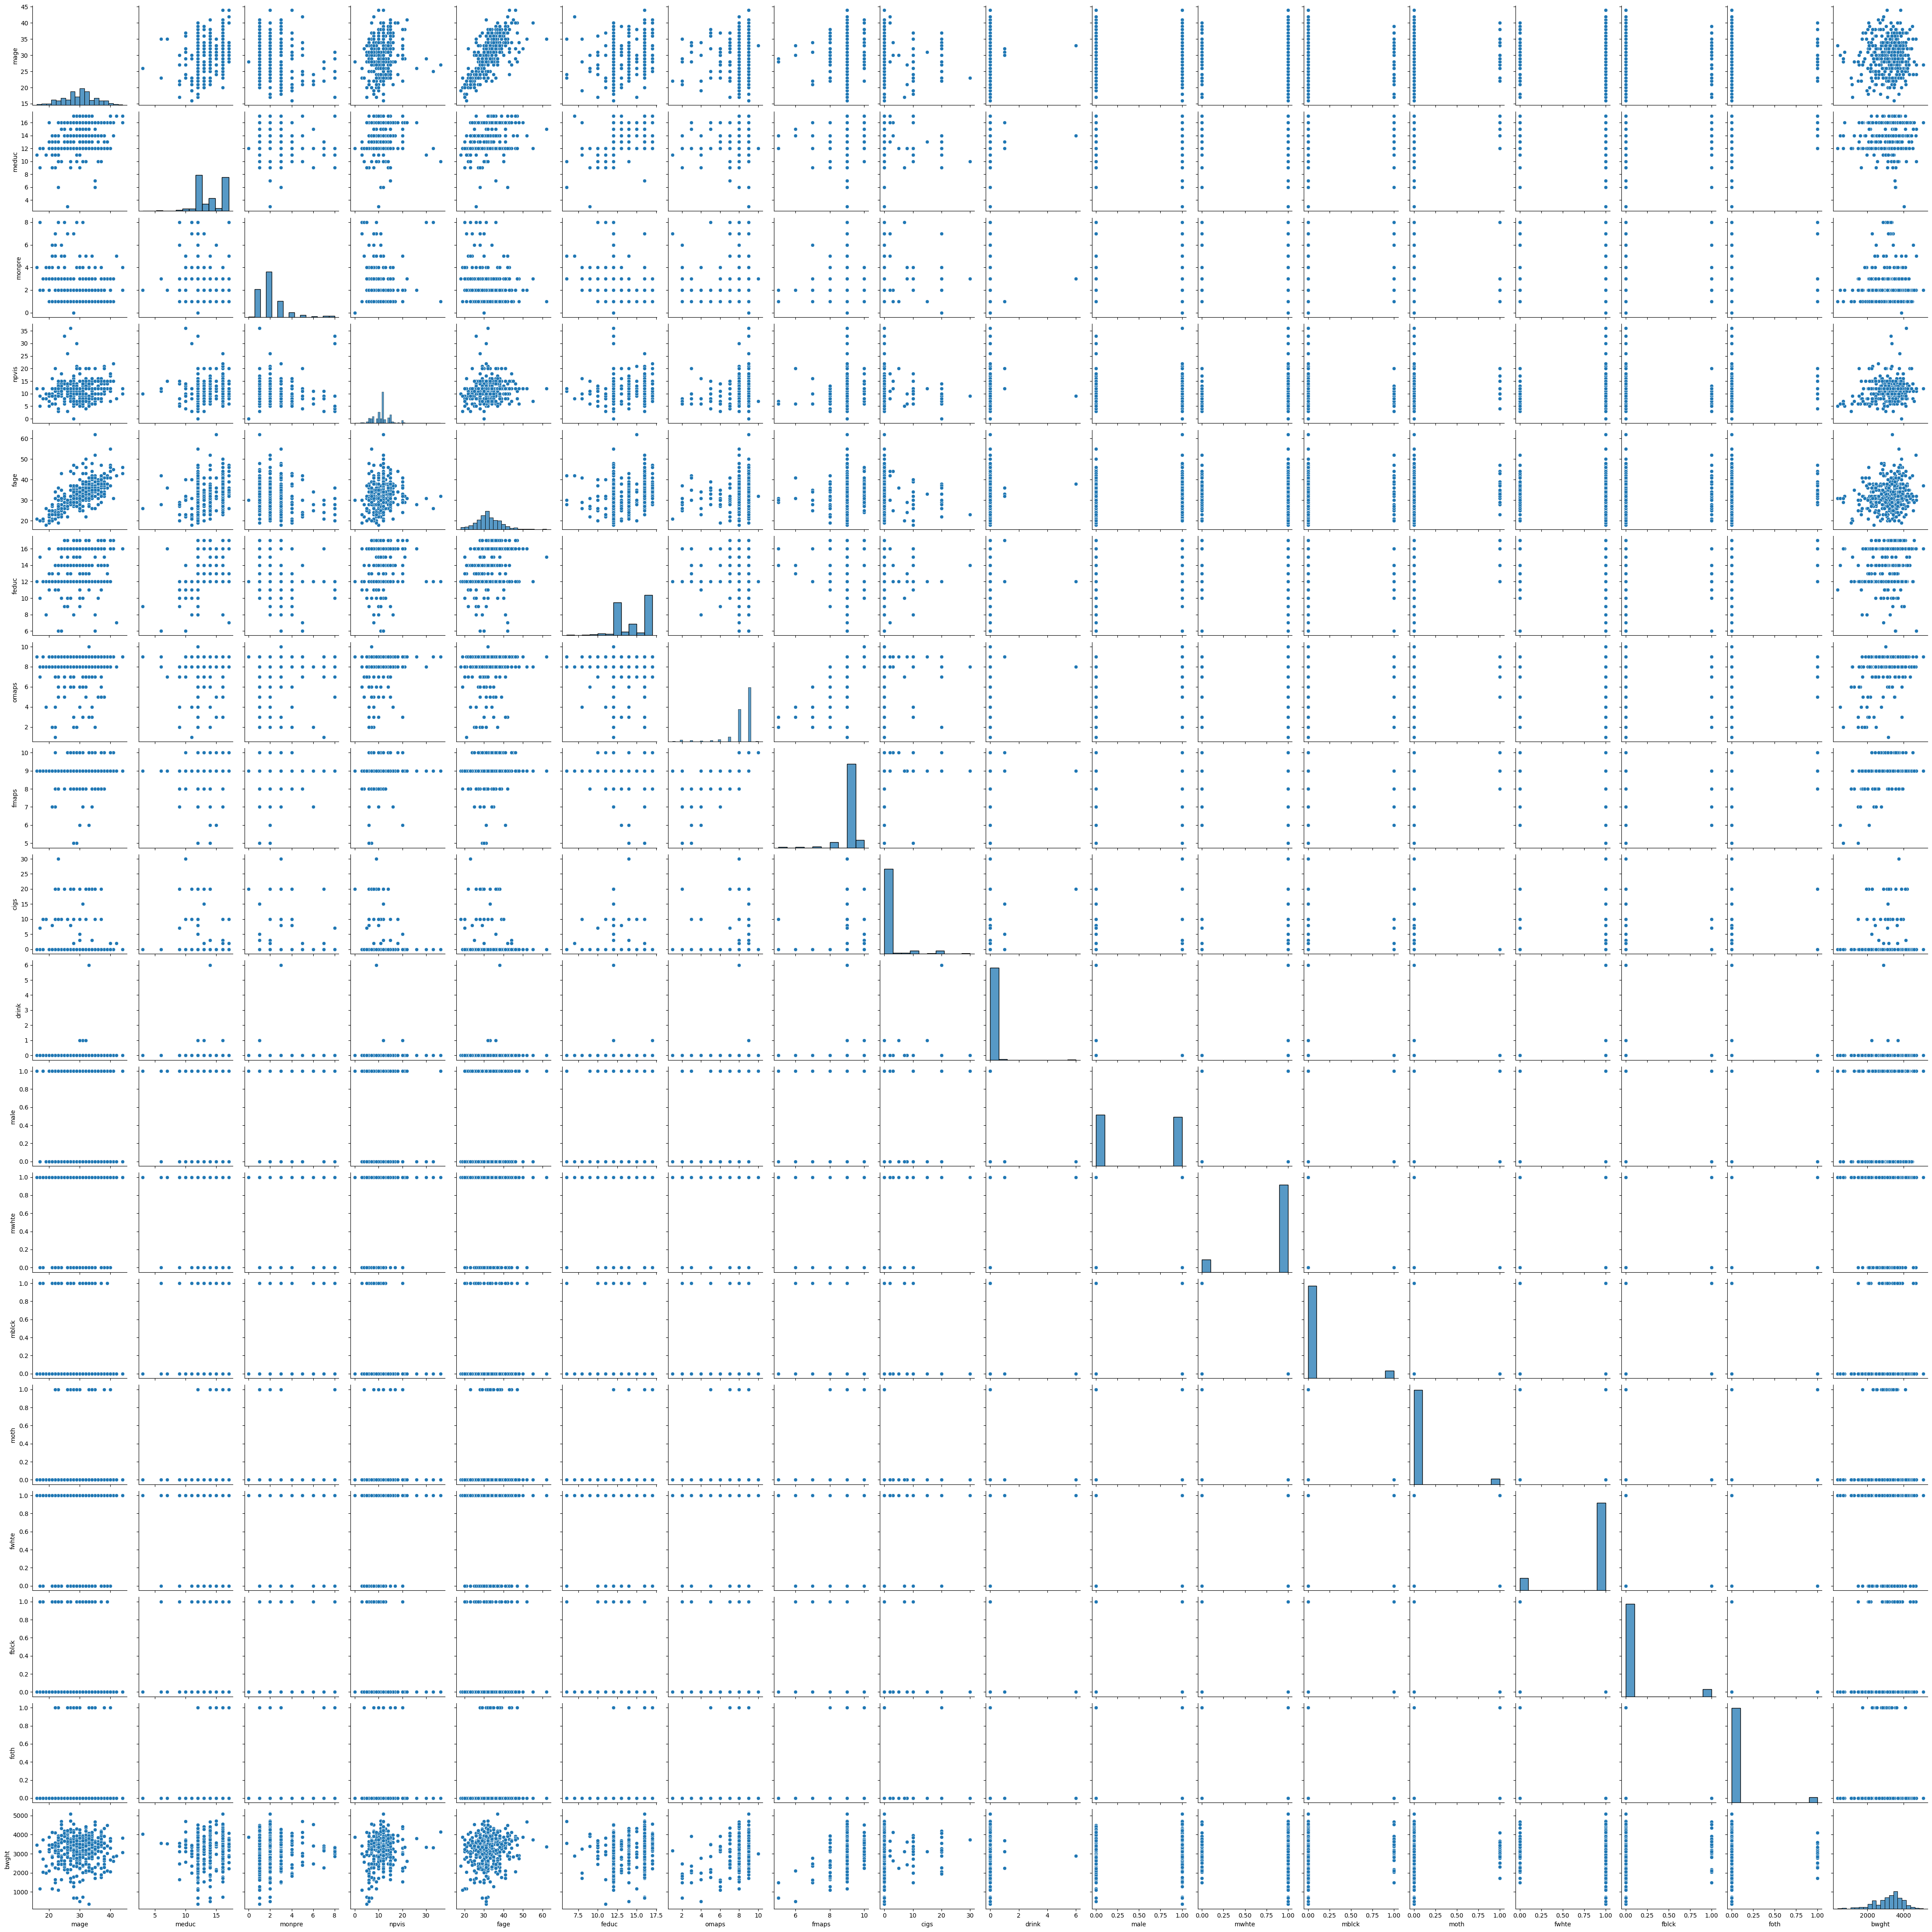

In [5]:
# Visualize data
sns.pairplot(df)
plt.show()

In [55]:
help(df[ non_continuous ].phik_matrix)

Help on method phik_matrix in module phik.phik:

phik_matrix(interval_cols: Optional[list] = None, bins: Union[int, list, numpy.ndarray, dict] = 10, quantile: bool = False, noise_correction: bool = True, dropna: bool = True, drop_underflow: bool = True, drop_overflow: bool = True, verbose: bool = True, njobs: int = -1) -> pandas.core.frame.DataFrame method of pandas.core.frame.DataFrame instance
    Correlation matrix of bivariate gaussian derived from chi2-value
    
    Chi2-value gets converted into correlation coefficient of bivariate gauss
    with correlation value rho, assuming giving binning and number of records.
    Correlation coefficient value is between 0 and 1.
    
    Bivariate gaussian's range is set to [-5,5] by construction.
    
    :param pd.DataFrame data_binned: input data
    :param list interval_cols: column names of columns with interval variables.
    :param bins: number of bins, or a list of bin edges (same for all columns), or a dictionary where per column 

In [148]:
## creating feature sets
continuous     = ['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'omaps',
                  'fmaps', 'cigs', 'drink', 'bwght']

non_continuous = [ 'male', 'mwhte', 'mblck', 'moth', 'fwhte','fblck', 'foth', 'bwght']


# pearson correlation
df_corr = df[ continuous ].corr(method = 'pearson').round(decimals = 4)
df_corr = df[ non_continuous ].corr(method = 'pearson').round(decimals = 4)

# checking results
print(f"""
Pearson Correlations
---------------------------
{df_corr.loc[ : , 'bwght' ].sort_values(ascending = False)}""")

# Calculate point-biserial correlations
point_biserial_corrs = []
for col in df[non_continuous].columns:
        corr, p_value = stats.pointbiserialr(df['bwght'], df[col])
        point_biserial_corrs.append((col, corr))
# Sort correlations by absolute value
point_biserial_corrs = sorted(point_biserial_corrs, key=lambda x: abs(x[1]), reverse=True)

# Print point-biserial correlations
print("\nPoint-Biserial Correlations")
print("---------------------------")
for col, corr in point_biserial_corrs:
    print(f"{col:>8}  {corr:.4f}")



Pearson Correlations
---------------------------
bwght    1.0000
male     0.0611
fblck    0.0418
mblck    0.0230
fwhte    0.0168
mwhte    0.0154
moth    -0.0494
foth    -0.0746
Name: bwght, dtype: float64

Point-Biserial Correlations
---------------------------
   bwght  1.0000
    foth  -0.0746
    male  0.0611
    moth  -0.0494
   fblck  0.0418
   mblck  0.0230
   fwhte  0.0168
   mwhte  0.0154


In [164]:
# Creating new variable based on birthweight threshold of 2,500g
df['low_bwght'] = np.where(df['bwght'] < 2600, 0, 1)

# Checking correlations using low birthweight variable
# Calculate point-biserial correlations
point_biserial_corrs_binary = []
for col in df[continuous].columns:
        corr, p_value = stats.pointbiserialr(df['low_bwght'], df[col])
        point_biserial_corrs_binary.append((col, corr))
        

# Sort correlations by absolute value
point_biserial_corrs_binary = sorted(point_biserial_corrs_binary, key=lambda x: abs(x[1]), reverse=True)

# Print point-biserial correlations
print("\nPoint-Biserial Correlations")
print("---------------------------")
for col, corr in point_biserial_corrs_binary:
    print(f"{col:>8}  {corr:.4f}")

if 'low_bwght' not in non_continuous:
    non_continuous.append('low_bwght')

# phi coefficients
df_phi_corr = df[ non_continuous ].phik_matrix(interval_cols = non_continuous).round(decimals = 4)


# checking results
print(f"""
Phi Coefficients
----------------
{df_phi_corr.loc[ : , 'low_bwght' ].sort_values(ascending = False)}
""")


Point-Biserial Correlations
---------------------------
   bwght  0.7802
   omaps  0.3746
   fmaps  0.3247
   npvis  0.1442
    fage  0.1038
  monpre  0.0522
    mage  0.0502
    cigs  -0.0475
   meduc  -0.0355
   drink  0.0160
   feduc  0.0137

Phi Coefficients
----------------
low_bwght    1.0000
bwght        0.9942
male         0.0000
mwhte        0.0000
mblck        0.0000
moth         0.0000
fwhte        0.0000
fblck        0.0000
foth         0.0000
Name: low_bwght, dtype: float64



As would be expected, there is a substantial and negative connection (-0.7736) between bwght and low_bwght. Lower birthweights are linked to the "low_bwght" category. In contrast to the previous correlations with bwght (0.3927 and 0.3701, respectively), the correlations between omaps (one-minute Apgar score), fmaps (five-minute Apgar score), and low_bwght have grown more negative (-0.3824 and -0.3220, respectively). This implies that the risk of low birthweight is more closely linked to lower Apgar scores. The connection that was previously favorable (0.1789) with bwght has now turned negative (-0.1334) with npvis (total number of prenatal visits). This shift in trend suggests that a higher risk of low birthweight is linked to fewer prenatal visits.




The widely recognized threshold for low birthweight is less than 2,500 grams. This benchmark is crucial because babies born below this weight are at a higher risk for health problems, both immediately following birth and later in life. The World Health Organization (WHO) and various pediatric studies emphasize the importance of this threshold in neonatal care and public health policies. The threshold is based on extensive research indicating increased morbidity and mortality rates among infants with low birthweight.

In [165]:
def standard_scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler(copy = True)


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = list(df.columns)
    
    return new_df

########################################
## visual_cm
########################################


def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

## Feature Engineering

From the code provided, the final model seems to utilize features like mage, fage, meduc, feduc, drink, cigs, avg_parent_age, avg_parent_education, and total_substance_use. Assuming the RandomForest or GradientBoosting classifiers provided feature importance rankings, the largest impacts might come from:

cigs: Actionable insight could be developing targeted smoking cessation programs for pregnant women.
npvis (if included in the final model beyond initial analysis): Emphasizing the importance of regular prenatal care and developing programs to make it more accessible could be a crucial insight.

In [166]:
df['avg_parent_age'] = (df['mage'] + df['fage']) / 2
df['avg_parent_education'] = (df['meduc'] + df['feduc']) / 2
df['total_substance_use'] = df['cigs'] + df['drink']


In [167]:
# Checking the Class balance
print(df['low_bwght'].value_counts(normalize=True))
df.columns

low_bwght
1    0.794621
0    0.205379
Name: proportion, dtype: float64


Index(['bwt_id', 'mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'omaps', 'fmaps', 'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck', 'foth', 'bwght', 'low_bwght', 'avg_parent_age', 'avg_parent_education', 'total_substance_use'], dtype='object')

## Model Development


In [168]:
# Split data into training and testing sets
features = ['mage', 'fage', 'meduc', 'feduc', 'drink', 'cigs',
            'avg_parent_age', 'avg_parent_education', 'total_substance_use']


X = df[features]
y = df['low_bwght']

X_train, X_test, y_train, y_test = train_test_split(
            X,
            y,
            random_state = 702,
            test_size    = 0.25,
            stratify     = y)

# Develop and evaluate models
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()
]

In [169]:
for model in models:
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    print(f"{model.__class__.__name__} Accuracy: {accuracy_score(y_train, y_train_pred):.3f}, Precision: {precision_score(y_train, y_train_pred):.3f}")

LogisticRegression Accuracy: 0.791, Precision: 0.793
KNeighborsClassifier Accuracy: 0.801, Precision: 0.807
DecisionTreeClassifier Accuracy: 0.987, Precision: 0.996
RandomForestClassifier Accuracy: 0.987, Precision: 0.984
GradientBoostingClassifier Accuracy: 0.889, Precision: 0.877


In [170]:
selected_model = LogisticRegression()
selected_model.fit(X_train, y_train)

# Classification report for the final model
y_pred = selected_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.80      1.00      0.89        82

    accuracy                           0.80       103
   macro avg       0.40      0.50      0.44       103
weighted avg       0.63      0.80      0.71       103



D:\New folder\python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\New folder\python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\New folder\python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [171]:
# Confusion matrix for the final model
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 0 21]
 [ 0 82]]


## Testing data 

In [172]:
# Assuming you have test data 
test_data = pd.read_csv('kaggle_test_data.csv')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [173]:
X_train['avg_parent_age'] = (X_train['mage'] + X_train['fage']) / 2
X_train['avg_parent_education'] = (X_train['meduc'] + X_train['feduc']) / 2
X_train['total_substance_use'] = X_train['cigs'] + X_train['drink']


test_data['avg_parent_age'] = (test_data['mage'] + test_data['fage']) / 2
test_data['avg_parent_education'] = (test_data['meduc'] + test_data['feduc']) / 2
test_data['total_substance_use'] = test_data['cigs'] + test_data['drink']


test_data_features = test_data[X_train.columns]

In [174]:
# Assuming X_train contains your training features

# Initialize scaler and imputer
scaler = StandardScaler()
imputer = SimpleImputer(strategy='mean')  # You can adjust the strategy as needed

# Fit scaler and imputer on training data
# Ensure to fit only on numeric columns if your data contains non-numeric features
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train_scaled = scaler.fit_transform(X_train[numeric_columns])
X_train_imputed = imputer.fit_transform(X_train_scaled)

# Now your scaler and imputer are fitted and can be used to transform the test data
# Apply the same feature engineering steps to your test data before this
# Make sure test_data_features only contains the columns you fitted the scaler and imputer on

# Scale and impute test data
test_data_scaled = scaler.transform(test_data_features[numeric_columns])
test_data_imputed = imputer.transform(test_data_scaled)


In [175]:
# Assuming selected_model is your trained model and test_data_imputed is ready for prediction
# Make predictions using the preprocessed test data
y_pred_final = selected_model.predict(test_data_imputed)

# Ensure test_df is the original DataFrame containing 'bwt_id'
submission_with_idss = pd.DataFrame({'bwt_id': test_df['bwt_id'], 'low_bwght': y_pred_final})

# Save the DataFrame as a CSV file for submission
submission_with_idss.to_csv('submission_with_id.csv', index=False)


D:\New folder\python\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Resluts:
Applying a threshold to convert birthweight into a binary variable (low_bwght) enables the use of phi coefficients to quantify relationships with binary predictors. Compared to continuous correlations, this transformation can more clearly illustrate the effects of certain behaviors or circumstances (such as smoking, prenatal care) on the risk of low birthweight. Because the binary transformation simplifies the variable and may mask more nuanced interactions found in the continuous measure, the strength of linkages may not always increase.



Final Conculsion: A precision of 0.80 for the majority class and warnings about undefined metrics for the minority class show that the model does a good job of detecting cases of normal birthweight, but it has trouble identifying instances of low birthweight, according to the confusion matrix and classification report. False negatives—predicting a normal birthweight when it is actually low—are especially worrisome in the context of public health because they signify lost chances for timely intervention. Therefore, in order to guarantee that all possible cases of low birthweight are found and receive the proper care, attempts to enhance the model should concentrate on lowering false negatives, even at the cost of raising false positives.